<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [17]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [19]:
import requests
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'

In [27]:
# Send an HTTP request to the URL and save the file
response = requests.get(url)

# Open a file in write-binary mode to save the downloaded content
with open('m4_survey_data.sqlite', 'wb') as file:
    file.write(response.content)

print("Download complete!")

Download complete!


In [29]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Demo: How to run an sql query


In [33]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [35]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [37]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [39]:
table_name = 'master'  

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


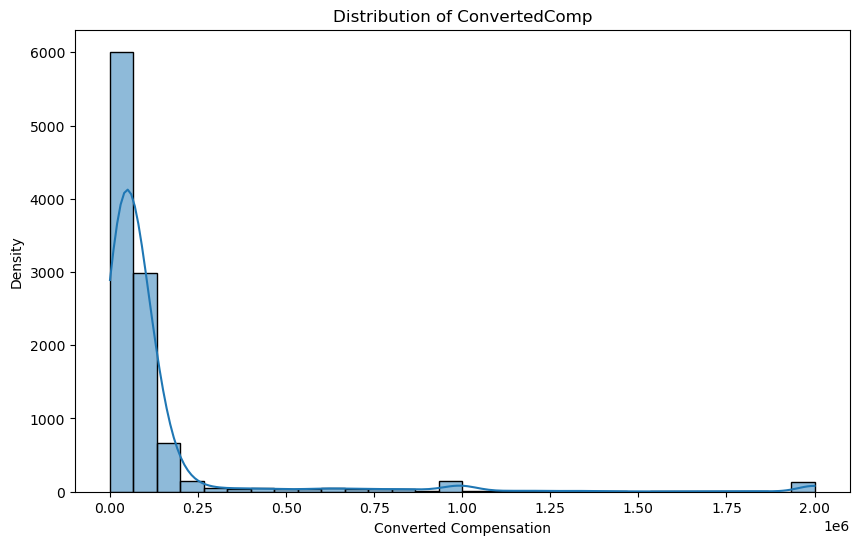

In [49]:
# your code goes here
# Step 1: Query the 'ConvertedComp' column from the database
query = "SELECT ConvertedComp FROM master WHERE ConvertedComp IS NOT NULL"  
df = pd.read_sql_query(query, conn)

# Step 2: Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ConvertedComp', kde=True, bins=30)  # You can adjust the 'bins' value as needed
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.show()

### Box Plots


Plot a box plot of `Age.`


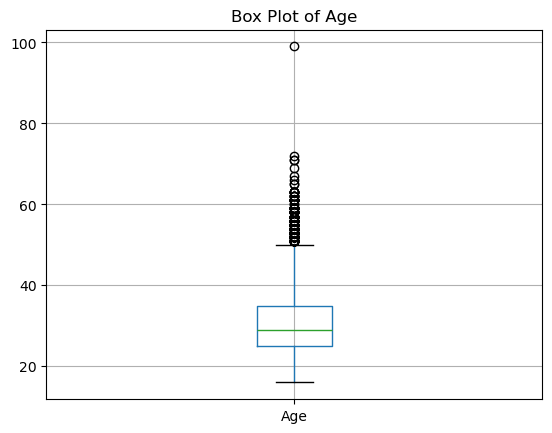

In [57]:
# your code goes here

# Step 1: Query the 'Age' column from the database
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.boxplot(column='Age')
plt.title('Box Plot of Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


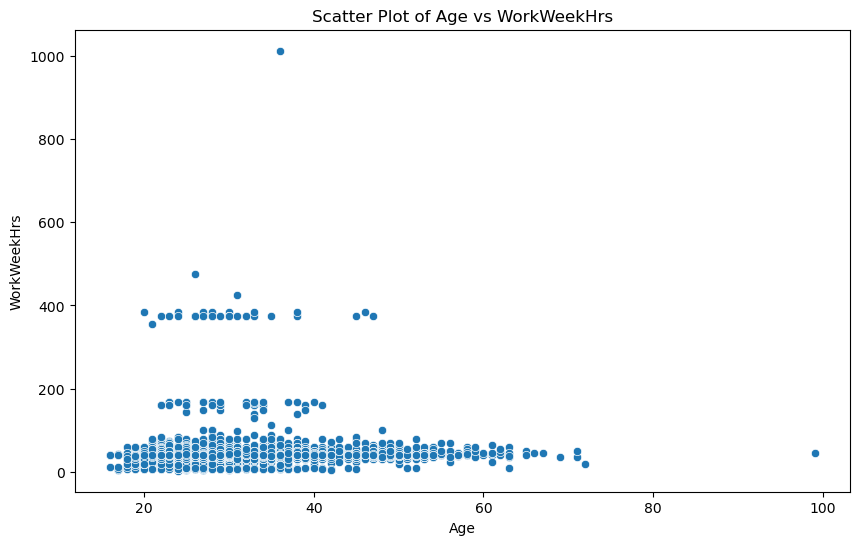

In [61]:
# your code goes here
# Step 1: Query the 'Age' and 'WorkWeekHrs' columns from the database
query = "SELECT Age, WorkWeekHrs FROM master WHERE Age IS NOT NULL AND WorkWeekHrs IS NOT NULL" 
df = pd.read_sql_query(query, conn)

# Step 2: Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['WorkWeekHrs'])
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


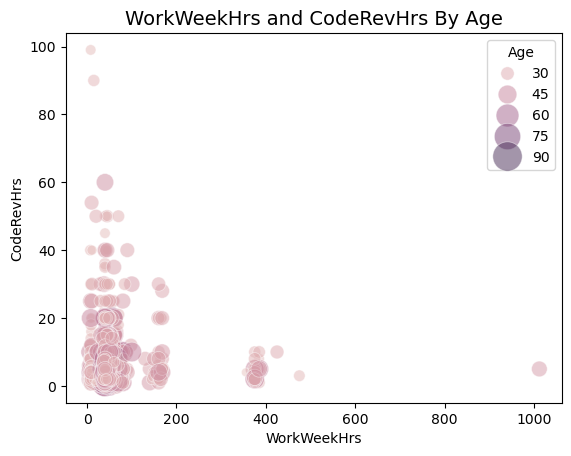

In [71]:
# your code goes here
# Step 1: Query the 'WorkWeekHrs', 'CodeRevHrs', and 'Age' columns from the database
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master WHERE WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL AND Age IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Step 2: Plot the bubble plot (using scatterplot with 'Age' as bubble size)
sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', alpha=0.5, sizes=(10, 500)) 

plt.title('WorkWeekHrs and CodeRevHrs By Age', size=14) 
plt.xlabel('WorkWeekHrs', size=10) 
plt.ylabel('CodeRevHrs', size=10)

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


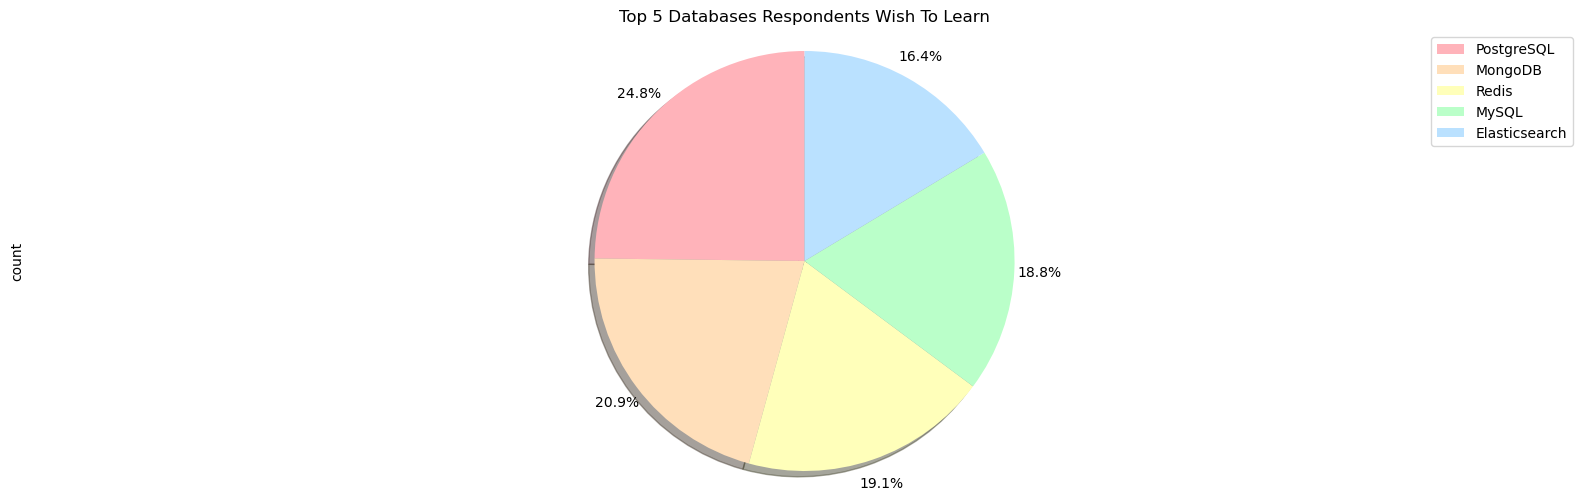

In [89]:
# your code goes here
# step1: import required lib
import matplotlib as mpl
import matplotlib.pyplot as plt

QUERY = """ 
SELECT DatabaseDesireNextYear, COUNT(*) as count 
from DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count(DatabaseDesireNextYear) DESC LIMIT 5 
""" 

df=pd.read_sql_query(QUERY,conn)  
df.set_index('DatabaseDesireNextYear', inplace=True) 

colors_list=['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#FFABAB']

df['count'].plot(kind='pie', figsize=(20,6), autopct='%1.1f%%', labels=None, startangle=90, colors=colors_list, shadow=True, pctdistance=1.12)  

plt.legend(labels=df.index, loc='upper right')
plt.title('Top 5 Databases Respondents Wish To Learn') 
plt.axis('equal')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


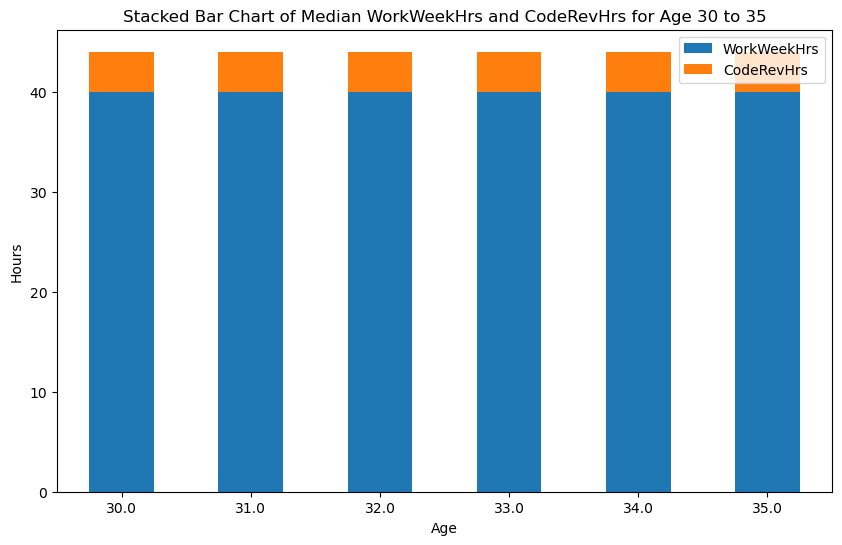

In [91]:
# your code goes here

# Step 1: Query the data for the age group 30 to 35
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
WHERE Age BETWEEN 30 AND 35 AND WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 2: Calculate the median for WorkWeekHrs and CodeRevHrs, grouped by Age
df1 = df.groupby('Age').median()

# Step 3: Plot the stacked bar chart
df1.plot(kind='bar', figsize=(10, 6), stacked=True)

# Set title and labels
plt.title('Stacked Bar Chart of Median WorkWeekHrs and CodeRevHrs for Age 30 to 35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.xticks(rotation=0)  # Rotate x labels for better readability

# Display the chart
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


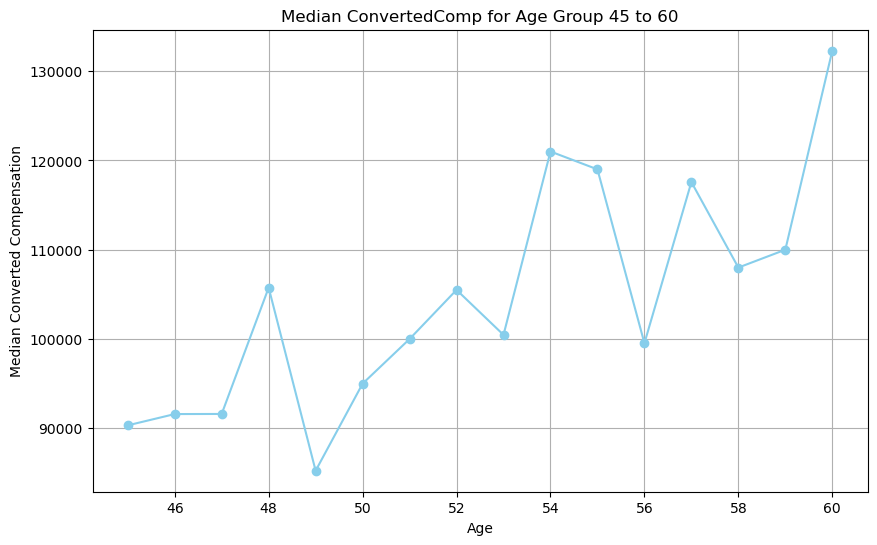

In [97]:
# your code goes here
# Step 1: Query the data for the age group 45 to 60
QUERY = """
SELECT ConvertedComp, Age FROM master
WHERE Age BETWEEN 45 AND 60 AND ConvertedComp IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 2: Calculate the median ConvertedComp, grouped by Age
median_converted_comp = df.groupby('Age')['ConvertedComp'].median()

# Step 3: Plot the median ConvertedComp using a line chart
plt.figure(figsize=(10, 6))
plt.plot(median_converted_comp.index, median_converted_comp.values, marker='o', color='skyblue', linestyle='-')

# Set title and labels
plt.title('Median ConvertedComp for Age Group 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.xticks(rotation=0)  

# Display the chart
plt.grid()  
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


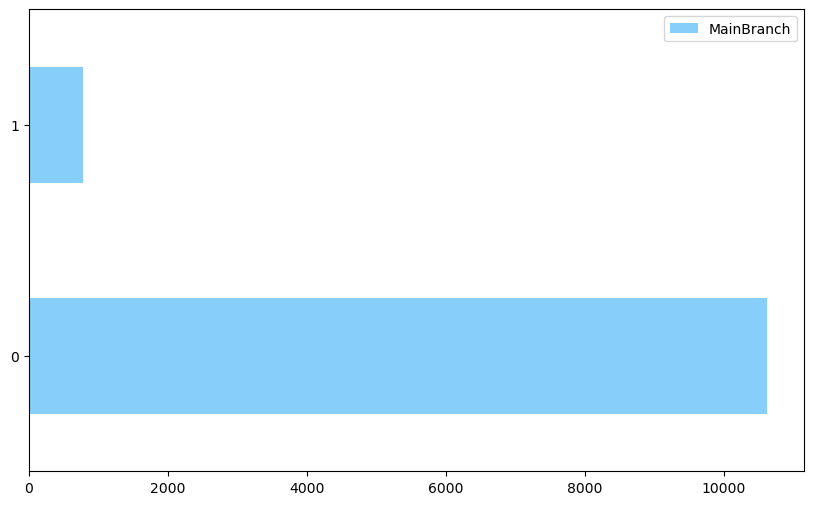

In [101]:
# your code goes here
# Step 1: Query the data to get the count of each MainBranch
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
from master
group by MainBranch
"""

df=pd.read_sql_query(QUERY,conn)

df.plot(kind='barh', figsize=(10,6), color='lightskyblue')

plt.show()


Close the database connection.


In [103]:
# Close the database connection
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
